In [6]:
import string  
import bibtexparser
from bibtexparser.bparser import BibTexParser
from bibtexparser.customization import convert_to_unicode
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

BIBTEX_PATH = 'C:\\Users\\Sofia\\Google Drive\\PhD\\Bibliography\\Bibtex\\'
filename = 'RAIS - PhD-RAIS - Reference Lists.bib'

In [7]:
with open(BIBTEX_PATH + filename, encoding='utf8') as bibtex_file:
    parser = BibTexParser()
    parser.customization = convert_to_unicode
    bib_database = bibtexparser.load(bibtex_file, parser=parser)

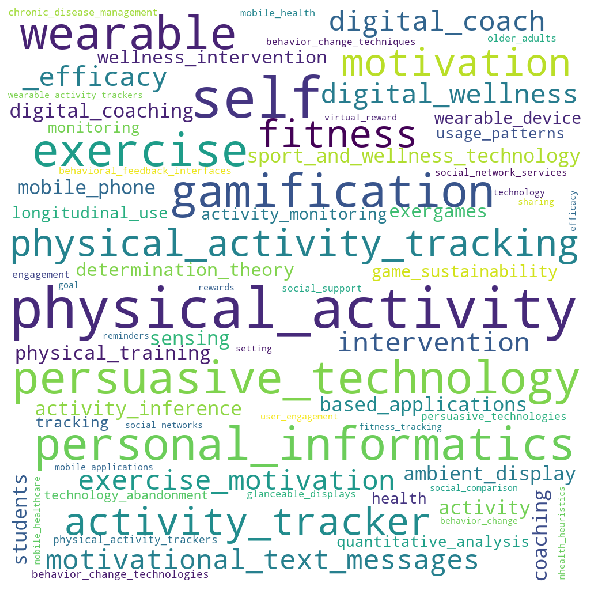

In [59]:
all_keywords = ''
stopwords = set(STOPWORDS)
for entry in bib_database.entries:
    if 'keywords' in entry:
        # print(entry['keywords'])
        entry_keywords = str(entry['keywords']).lower().split(',')
        for keyword in entry_keywords:
            keyword = keyword.replace(' ', '_')
            all_keywords = all_keywords + keyword + ' '
# print(all_keywords)
            
wordcloud = WordCloud(width=1000, height=1000, 
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(all_keywords)

# plot the WordCloud image   
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

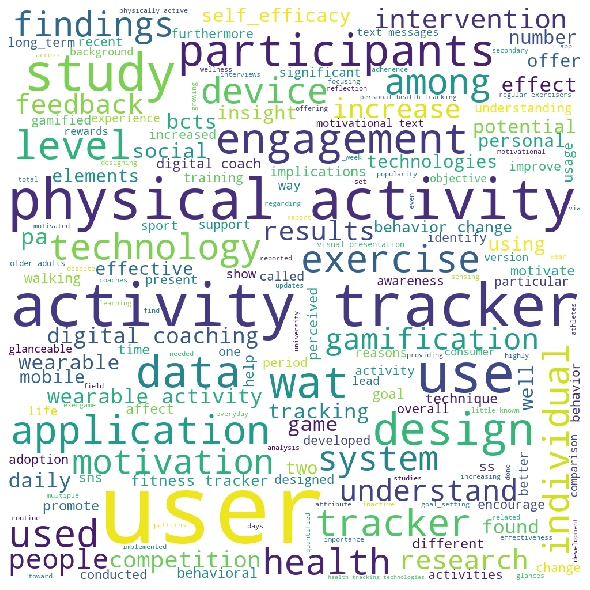

In [60]:
all_abstracts = ''
stopwords = set(STOPWORDS)
for entry in bib_database.entries:
    if 'abstract' in entry:
        # print(entry['keywords'])
        entry_abstract = str(entry['abstract']).lower()
        # Removing numbers
        remove_digits = str.maketrans('', '', string.digits)
        entry_abstract = entry_abstract.translate(remove_digits)
        # Removing punctuation except for hyphens
        remove_punctuation = string.punctuation
        remove_punctuation = remove_punctuation.replace("-", "") # don't remove hyphens
        remove_punctuation = str.maketrans('', '', remove_punctuation)
        entry_abstract = entry_abstract.translate(remove_punctuation)
        entry_words = entry_abstract.split(' ')
        for entry_word in entry_words:
             word = entry_word.replace('-', '_')
             all_abstracts = all_abstracts + word + ' '

wordcloud = WordCloud(width=1000, height=1000, 
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(all_abstracts)

# plot the WordCloud image   
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

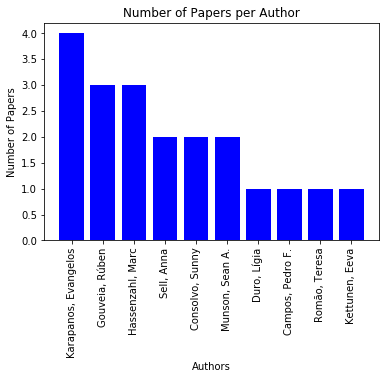

In [68]:
all_authors = {}
for entry in bib_database.entries:
    if 'author' in entry:
        authors = entry['author'].split(' and ')
        for author in authors:
            if author in all_authors:
                all_authors[author] = all_authors[author] + 1
            else:
                all_authors[author] = 1

sorted_authors = sorted(all_authors.items(), key=lambda x: x[1], reverse=True)
top_10_authors = sorted_authors[:10]

# Get keys (x axis) and values (y axis)
authors_names =  [t[0] for t in top_10_authors]
authors_papers =  [t[1] for t in top_10_authors]
authors_pos = [i for i, _ in enumerate(authors_names)]

plt.bar(authors_pos, authors_papers, color='blue')
plt.xlabel("Authors")
plt.ylabel("Number of Papers")
plt.title("Number of Papers per Author")

plt.xticks(authors_pos, authors_names, rotation='vertical')

plt.show()

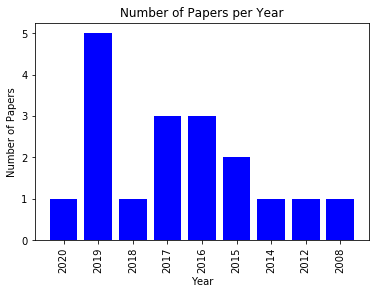

In [8]:
all_years = {}
for entry in bib_database.entries:
    if 'year' in entry:
        year = entry['year']
        if year in all_years:
            all_years[year] = all_years[year] + 1
        else:
            all_years[year] = 1

sorted_years = sorted(all_years.items(), key=lambda x: x[0], reverse=True)
# Get keys (x axis) and values (y axis)
years_labels =  [t[0] for t in sorted_years]
papers =  [t[1] for t in sorted_years]
years_pos = [i for i, _ in enumerate(years_labels)]

plt.bar(years_pos, papers, color='blue')
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.title("Number of Papers per Year")

plt.xticks(years_pos, years_labels, rotation='vertical')

plt.show()         
